# SU(3) Phase Transition in the Early Universe

This notebook performs a very simplified simulation of the confining phase transition of a dark SU(3) gauge theory in the early universe.  The confinement scale is $T_c = \Lambda$, which we vary at different points in the notebook.  Otherwise, we typically set $\Lambda = 1\,$TeV.

## Imports

In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc_file('matplotlibrc')

import random
from tqdm import tqdm_notebook as tqdm
from scipy.interpolate import interp1d
from scipy.integrate import quad

# This is the module where all of the 
# useful functions/constants are defined
import compositools as ct

# Neglecting Quark Pressure (Pure Yang-Mills)

In [135]:
# Define Constants and Functions #

# Measure everything in units of Tc
Tc    = 1
l, sigma, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
rho = np.pi**2/30*106.75 * Tc**4

# The only other scale is Mpl, so it is  
# the only quantity that changes with Tc. 
# e.g. if Tc = 10 TeV, Mpl =  ct.Mpl/np.sqrt(3)/1e13

# Define Mpl = (G 8 pi /3)^-1/2 in TeV
Mpl   = ct.Mpl/np.sqrt(3)/1e12
H    = np.sqrt(rho)/Mpl
dt   = 1e-6/H;

def Gamma(T,A=1):
    return A*Tc**4*np.exp(-kappa*Tc**2/(T-Tc)**2)*np.sign(Tc-T)

def Rc(T):
    return 2*sigma/l*Tc/(Tc-T)

def vslow(R,T,Tc=None):
    v_term = (1-T/Tc)
    return v_term * np.sign(R-Rc(T))

In [21]:
# First Half of the Phase Transition: Bubble Expansion #
T, x, R_bub, n_bub = np.array([Tc*(1-1e-4)]), np.array([0]), np.array([]), np.array([])
vglob = np.array([0])

k=0
times = np.array([0])

print('t*H, x, Gamma dt')
while x[k]<0.5:

    # Hubble Cooling
    T = np.append(T, T[k]*(1 - dt*H))

    # Get rid of zero radius bubbles or radii corresponding to zero bubbbles
    mask = (R_bub != 0) & (n_bub != 0)
    R_bub, n_bub = R_bub[mask], n_bub[mask]

    # Expand old bubbles
    for j, R in enumerate(R_bub):
        # Bubbles are allowed to shrink, but they can't have negative radii
        R_bub[j] =  np.max([R+dt*vslow(R,T[k],Tc),0])

    # Add bubbles at critical radius
    R_bub = np.append(R_bub, Rc(T[k]))
    
    # Add this many bubbles at critical radius, per unit volume
    n_bub = np.append(n_bub, Gamma(T[k]) * (1-x[k]) * dt)
    # A nice way to speed up the code if you want a smaller dt
#     dndt = Gamma(T[k]) * (1-x[k])
#     if dndt < 1e-46:
#         dndt = 0

    # Keep track of global threshold
    vglob = np.append(vglob, 100*H/(4*np.pi * np.sum(R_bub**2 * n_bub)))

    # Update the Fraction in the Confined Phase
    x = np.append(x, np.sum(4*np.pi*R_bub**3/3 * n_bub))
    
    # Phase conversion results in heating
    T[k+1] += L/(4*rho/Tc) * (x[k+1] - x[k])
    
    # Output
    if (n_bub[-1]>1e-55):
        interval = 5
    else:
        interval = 100
        
    if((k-1)%interval == 0):
        print('{:.2}'.format(times[-1]*H), ' ', 
              '{:.3}'.format(x[k]), ' ', 
              '{:.3}'.format(n_bub[-1]/dt))

    times = np.append(times, times[-1] + dt)
    k+=1
R0 = np.sum(n_bub*R_bub)/np.sum(n_bub)

t*H, x, Gamma dt
1e-06   0.0   0.0
0.0001   0.0   0.0
0.0002   0.0   0.0
0.0003   1.82e-167   7.44e-190


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


0.0004   1.3e-97   6.67e-122
0.0005   2.85e-59   6.1e-85
0.0006   8.19e-37   1.58e-63
0.0006   7.17e-36   1.24e-62
0.00061   6e-35   9.24e-62
0.00061   4.81e-34   6.62e-61
0.00062   3.7e-33   4.55e-60
0.00062   2.73e-32   3.01e-59
0.00063   1.94e-31   1.91e-58
0.00063   1.32e-30   1.17e-57
0.00064   8.67e-30   6.89e-57
0.00064   5.49e-29   3.92e-56
0.00065   3.35e-28   2.15e-55
0.00065   1.98e-27   1.14e-54
0.00066   1.13e-26   5.88e-54
0.00066   6.23e-26   2.93e-53
0.00067   3.33e-25   1.41e-52
0.00067   1.73e-24   6.6e-52
0.00068   8.67e-24   3e-51
0.00068   4.23e-23   1.32e-50
0.00069   2e-22   5.67e-50
0.00069   9.22e-22   2.37e-49
0.0007   4.13e-21   9.61e-49
0.0007   1.8e-20   3.8e-48
0.00071   7.66e-20   1.47e-47
0.00071   3.17e-19   5.52e-47
0.00072   1.28e-18   2.03e-46
0.00072   5.05e-18   7.27e-46
0.00073   1.94e-17   2.55e-45
0.00073   7.3e-17   8.73e-45
0.00074   2.69e-16   2.93e-44
0.00074   9.65e-16   9.59e-44
0.00075   3.4e-15   3.08e-43
0.00075   1.17e-14   9.7e-43
0.0

In [23]:
# Second Half of the Phase Transition: Pocket Contraction #
T2     = np.array([T[-1]])
x2     = np.array([0.5])

R1 = 10**(-8/3) * (Mpl/Tc)**(2/3)
n_pocket = 3/(8*np.pi * R1**3)
R2 = np.array([R1])
times2 = np.array([0])

k=0
while R2[-1]>0:

    T2 = np.append(T2, T2[k]*(1 - dt*H))

    x2 = np.append(x2, 1-4*np.pi*R2[-1]**3/3 * n_pocket)
    R2 = np.append(R2, R2[-1] - (1-T2[k])*dt)

    # Injected heat
    T2[k+1] += L/(4*rho/Tc) * (x2[k+1] - x2[k])

    times2 = np.append(times2, times2[-1] + dt)
    k+=1

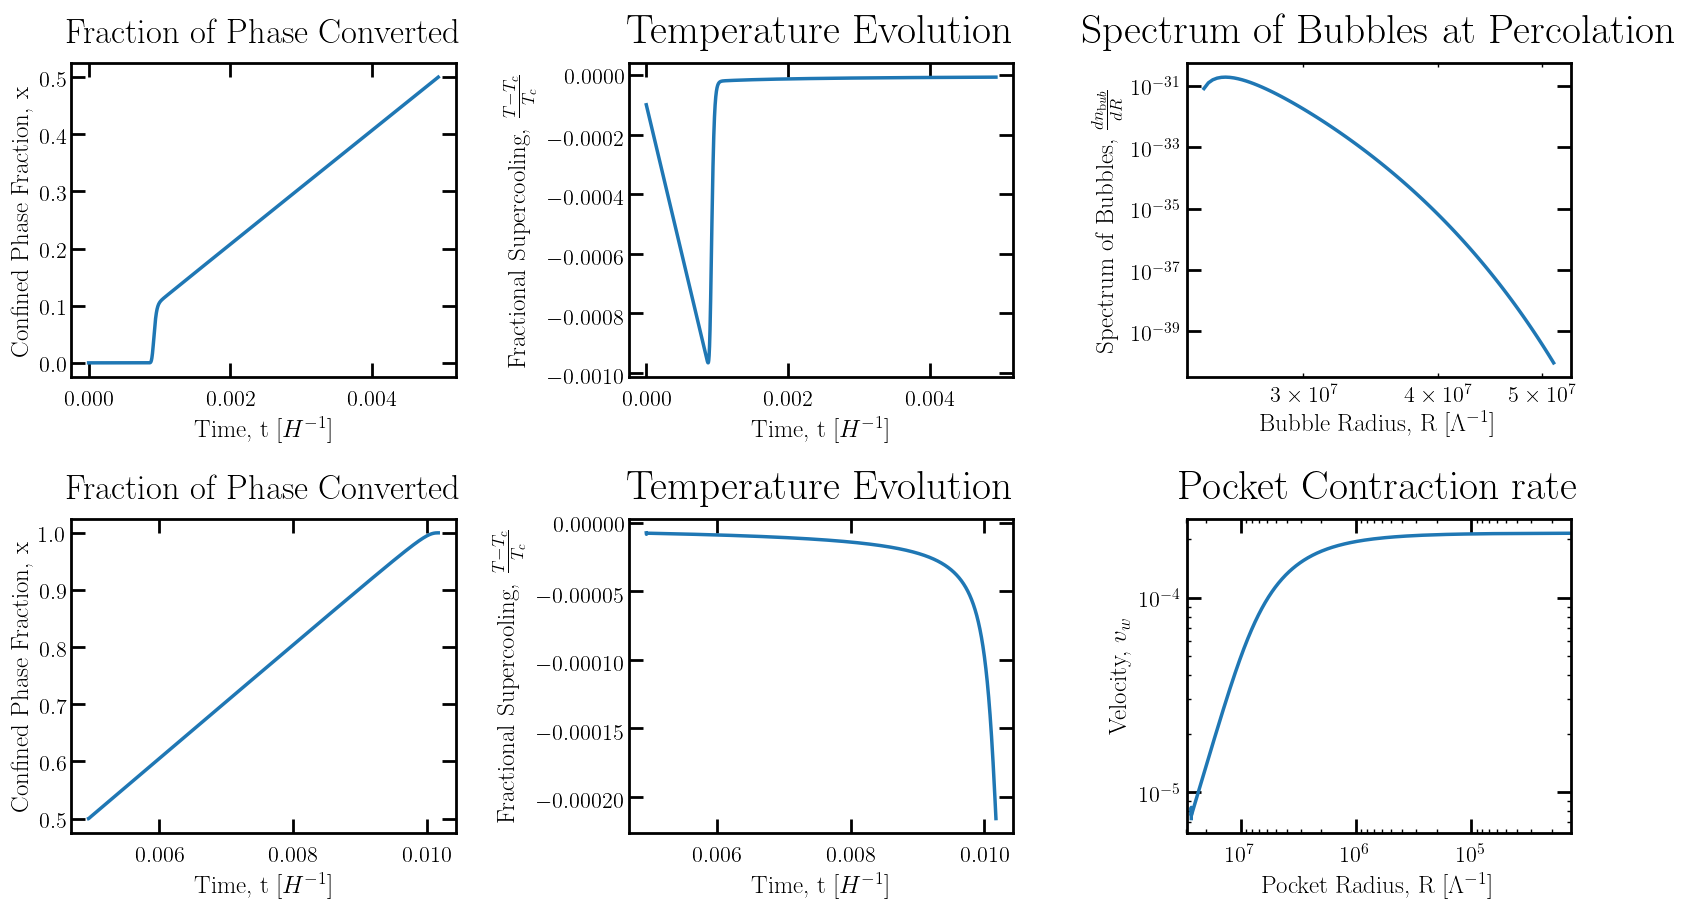

In [25]:
# Generate Plots for Paper #

fig, axarr = plt.subplots(2, 3, figsize=(15,10))

axarr[0][0].plot(times*H, x)
axarr[0][0].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[0][0].set_ylabel('Confined Phase Fraction, x', fontsize=18)
axarr[0][0].set_title('Fraction of Phase Converted', fontsize=25)

axarr[0][1].plot(times*H, T/Tc-1)
axarr[0][1].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[0][1].set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=18)
axarr[0][1].set_title('Temperature Evolution', fontsize=30)

mask = (n_bub >= np.max(n_bub)*1e-10) & (R_bub != 0)
a = np.transpose([R_bub[mask],n_bub[mask]])
data = a[a[:,0].argsort()]
dndR = np.abs(np.diff(data[:,1])/np.diff(data[:,0]))

axarr[0][2].plot(data[:-1,0] * Tc, dndR / Tc**2)
axarr[0][2].loglog()
axarr[0][2].set_xlabel(r'Bubble Radius, R [$\Lambda^{-1}$]', fontsize=18)
axarr[0][2].set_ylabel(r'Spectrum of Bubbles, $\frac{dn_{\mathrm bub}}{dR}$', fontsize=18)
axarr[0][2].set_title('Spectrum of Bubbles at Percolation', fontsize=30)

axarr[1][0].plot((times[-1]+times2)*H, x2)
axarr[1][0].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[1][0].set_ylabel('Confined Phase Fraction, x', fontsize=18)
axarr[1][0].set_title('Fraction of Phase Converted', fontsize=25)


axarr[1][1].plot((times[-1]+times2)*H, T2/Tc-1)
axarr[1][1].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[1][1].set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=18)
axarr[1][1].set_title('Temperature Evolution', fontsize=30)

axarr[1][2].set_xlim([R2[0]*1.1, R2[-2]*.99])
axarr[1][2].plot(R2, 1-T2/Tc)#, label='0.5')
axarr[1][2].loglog()
axarr[1][2].set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=18)
axarr[1][2].set_ylabel(r'Velocity, $v_w$', fontsize=18)
axarr[1][2].set_title('Pocket Contraction rate', fontsize=30)

plt.subplots_adjust(wspace=0.45, hspace=0.45, left=-0.0, right=1+0.0)

# plt.subplots_adjust(wspace=0.35, left=-0.0, right=1+0.0)

## First Half of Phase Transition Plots

Text(0.5, 1.0, 'Fraction of Phase Converted')

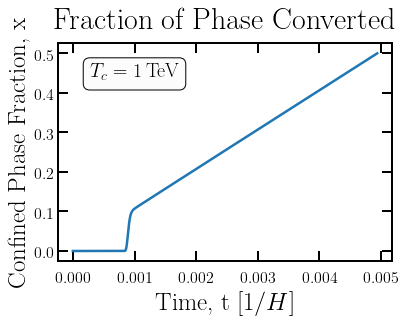

In [9]:
plt.figure()
ax = plt.gca()
ax.plot(times*H, x)

txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(.001, .448, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel('Confined Phase Fraction, x', fontsize=25)
ax.set_title('Fraction of Phase Converted', fontsize=30)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/x_vs_t_new3.pdf')

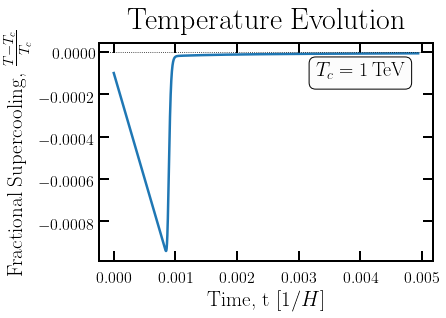

In [12]:
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(times*H, (T/Tc-1))

ax1.set_xlabel(r'Time, t [$1/H$]', fontsize=21)
ax1.set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=21)
ax1.set_title('Temperature Evolution', fontsize=30)


txt = r"$T_c = 1\,\mathrm{TeV}$"
ax=plt.gca()
ax.text(.004, -1e-4, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})


plt.axhline(0, linestyle=':', linewidth=0.8, color='k')

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/T_vs_t_new3.pdf')

Text(0.5, 1.0, 'Spectrum of Bubbles at Percolation')

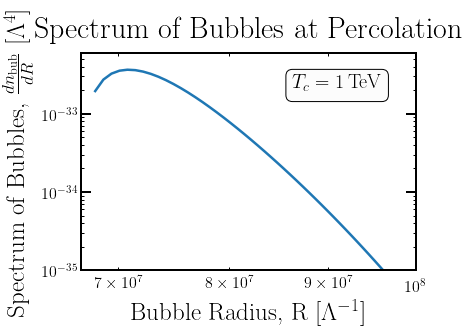

In [29]:
plt.figure()
ax = plt.gca()
ax.loglog()
ax.set_yscale('log')
ax.plot(data[:-1,0], dndR)#, label='0.5')

ax=plt.gca()
ax.text(9.1e7, 2.3e-33, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

plt.axis([6.7e7,1e8,1e-35,6e-33])
ax.set_xlabel(r'Bubble Radius, R [$\Lambda^{-1}$]', fontsize=25)
ax.set_ylabel(r'Spectrum of Bubbles, $\frac{dn_{\mathrm{bub}}}{dR}$ [$\Lambda^4$]', fontsize=25)
ax.set_title('Spectrum of Bubbles at Percolation', fontsize=30)
# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/spec_new3.pdf')

## Second Half of Phase Transition Plots

Text(0.5, 1.0, 'Fraction of Phase Converted')

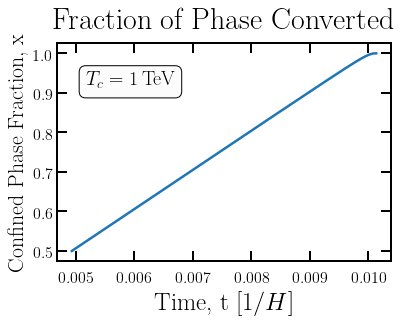

In [34]:
plt.figure()
ax = plt.gca()
ax.plot((times[-1]+times2)*H, x2)


txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(times[-1]*H+.001, .428+0.5, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel('Confined Phase Fraction, x', fontsize=22)
ax.set_title('Fraction of Phase Converted', fontsize=30)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/x_vs_t_pt2.pdf')

Text(0.5, 1.0, 'Temperature Evolution')

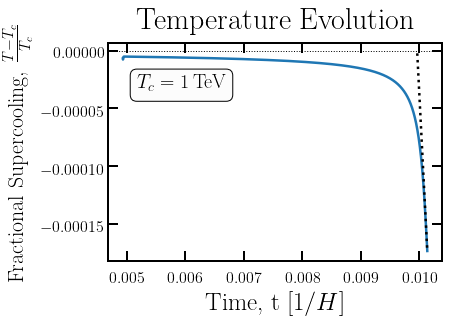

In [36]:
ind=0

# Does the end of the Simulation return to Hubble cooling?
sz = len(times)
tms = times2[-172:]
temp = np.array([(T2-1)[-1] + (times2[-1]-tm)*H for tm in tms])

plt.figure()
ax = plt.gca()
ax.plot((times[-1]+times2[ind:])*H, (T2-1)[ind:])
ax.plot((times[-1]+tms[ind:])*H,temp[ind:], color='k', linestyle=':', label='Hubble Slope')


txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(times[-1]*H+.001, -3e-5, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})


plt.axhline(0, color='k', linestyle=':', linewidth=1.0)
ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=22)
ax.set_title('Temperature Evolution', fontsize=30)
# leg = ax.legend(fontsize=20, loc=2)
# leg.set_title(txt)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/T_vs_t_pt2.pdf')

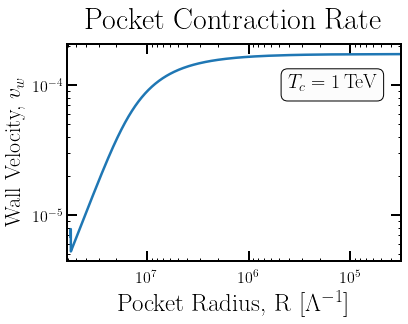

In [51]:
plt.figure()
ax = plt.gca()
ax.plot(R2, 1-T2/Tc)

ax.loglog()
ax.set_xlim([R2[0]*1.1, R2[-2]*.99])
txt = r"$T_c = 1\,\mathrm{TeV}$"
ax.text(1.5e5, 1e-4, txt,
         {'color': 'black', 'fontsize': 20, 'ha': 'center', 'va': 'center',
          'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

plt.axhline(0, color='k', linestyle=':', linewidth=1.0)
ax.set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=22)
ax.set_title('Pocket Contraction Rate', fontsize=30)

plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/vw_vs_R.pdf')

Calculating the Global Threshold (i.e. the velocity threshold past which pockets/bubbles produce a net heating of the plasma):

All pockets are of radius $R$
$$
\begin{alignat}{1}
1-x &= \frac{4 \pi}3 R^3 n_\text{pocket}  \\
4\pi R^2 n_\text{pocket} v_w &= 100 H \\ 
v_w &= \frac{200 R_0^2}{3 R^2} (H \, R_0)
\end{alignat}
$$

In the first half there are $n_i$ bubbles (per unit volume) of radius $R_i$
$$
\begin{alignat}{1}
x &= \frac{4 \pi}3 R_i^3 n_i  \\
4\pi R_i^2 n_i v_w &= 100 H \\ 
v_w &= \frac{100 H}{4 \pi R_i^2 n_i}
\end{alignat}
$$

[None, None]

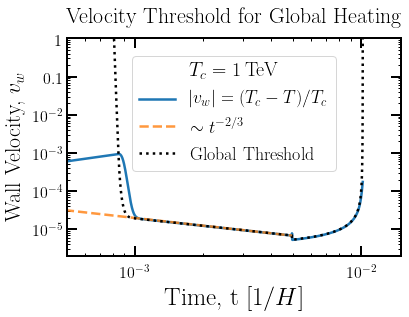

In [48]:
ind = 795

plt.figure()
ax = plt.gca()
ax.loglog()
ax.plot(np.append(times,(times[-1]+times2))*H, np.append(1-T,1-T2), 
        label=r'$\left| v_w \right| = (T_c-T)/T_c$')

# t^-2/3 scaling during the Maxwell Construction regime?
ax.plot(times[100:]*H, 
        times[100:]**(-2/3) * (1-T[-200])/times[-200]**(-2/3),
       alpha=.8, linestyle='--', label=r'$\sim t^{-2/3}$')

tmpv = np.append(vglob[ind:], 200/3*(R1/R2)**2 * H*R1)
ax.plot(np.append(times[ind:],(times[-1]+times2))*H, tmpv, 
        label='Global Threshold', linestyle=':', color='k')

ax.set_ylim([2e-6,1])
ax.set_xlim([5e-4,1.5e-2])
plt.axhline(0, color='k', linestyle='--', linewidth=1.0)
ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=22)
ax.set_title(r'Velocity Threshold for Global Heating', fontsize=22)


leg = ax.legend(loc=9, title=r'$T_c = 1 \, \mathrm{TeV}$', fontsize=18)
plt.setp(leg.get_title(), fontsize=20)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/glob_thresh1.pdf')

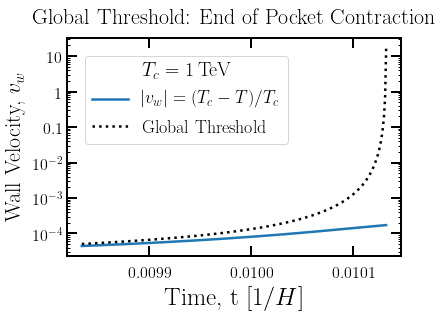

In [47]:
ind=300
plt.figure()
ax = plt.gca()
# ax.loglog()
ax.set_yscale('log')
ax.plot((times[-1]+times2[-ind:-1])*H, 1-T2[-ind:-1], 
        label=r'$\left| v_w \right| = (T_c-T)/T_c$')

ax.plot((times[-1]+times2[-ind:-1])*H, 200/3*(R1/R2[-ind:-1])**2 * H*R1, 
        label='Global Threshold', linestyle=':', color='k')


plt.axhline(0, color='k', linestyle=':', linewidth=1.0)
ax.set_xlabel(r'Time, t [$1/H$]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=22)
ax.set_title('Global Threshold: End of Pocket Contraction', fontsize=22)

leg = ax.legend(fontsize=18, title=r'$T_c = 1 \, \mathrm{TeV}$')
plt.setp(leg.get_title(), fontsize=20)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/glob_thresh2.pdf')

## Generate R$_0$ vs. $\Lambda$

In [19]:
# Measure everything in units of Tc #
# Larger Tc means smaller Mpl #
Tc    = 1
Lams    = 10**np.arange(0,6,.5)
R0_list = np.zeros_like(Lams)
for ii,Lam in enumerate(tqdm(Lams)):
    Mpl   = 1.220910e16/np.sqrt(8*np.pi/3)/Lam

    L, mu, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
    rho = np.pi**2/30*106.75 * Tc**4
    H    = np.sqrt(rho)/Mpl
    dt   = 1e-6/H;

    def Gamma(T,A=1):
        return A*Tc**4*np.exp(-kappa*Tc**2/(T-Tc)**2)*np.sign(Tc-T)

    def Rc(T):
        return 2*mu/L*Tc/(Tc-T)

    def vslow(R,T,Tc=None):
        v_term = (1-T/Tc)
        return v_term * np.sign(R-Rc(T))

    T, x, R_bub, n_bub = np.array([Tc*(1-1e-4)]), np.array([0]), np.array([]), np.array([])
    k=0
    times = np.array([0])
    while x[k]<0.5:

        T = np.append(T, T[k]*(1 - dt*H))

        mask = (R_bub != 0) & (n_bub != 0)
        R_bub, n_bub = R_bub[mask], n_bub[mask]

        for j, R in enumerate(R_bub):
            R_bub[j] =  np.max([R+dt*vslow(R,T[k],Tc),0])

        R_bub = np.append(R_bub, Rc(T[k]))
        n_bub = np.append(n_bub, Gamma(T[k]) * (1-x[k]) * dt)
        x = np.append(x, np.sum(4*np.pi*R_bub**3/3 * n_bub))
        T[k+1] += L/(4*rho/Tc) * (x[k+1] - x[k])

        times = np.append(times, times[-1] + dt)
        k+=1

    R0_list[ii] = np.sum(n_bub*R_bub)/np.sum(n_bub)

In [ ]:
# Find a linear fit to the log-log plot
from scipy.optimize import curve_fit

def f(x, A, B):
    return A*x + B

popt, pcov = curve_fit(f, np.log10(Lams), np.log10(R0_list))
popt

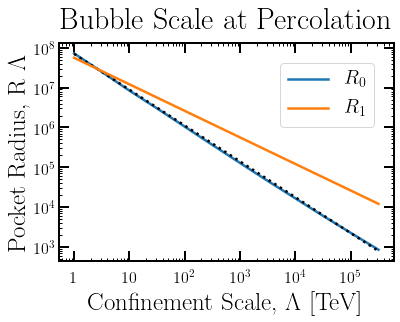

In [366]:
# Reduced Planck Mass
Mpl_red = 1.220910e16/np.sqrt(8*np.pi)

plt.figure()#figsize=(4,4))
plt.loglog()
plt.plot(Lams, R0_list, label='$R_0$')
# plt.plot(Lams,6.7e7*Lams**(-.9), linestyle=':', color='k')
plt.plot(Lams,1e-6*(Lams/Mpl_red)**(-.9), linestyle=':', color='k')
Mpl = 1.220910e16/np.sqrt(8*np.pi/3)
plt.plot(Lams,  10**(-8/3) * (Mpl/Lams)**(2/3), label=r'$R_1$')
plt.xlabel(r'Confinement Scale, $\Lambda$ [TeV]', fontsize=25)
plt.ylabel(r'Pocket Radius, R $\Lambda$', fontsize=25)
plt.title(r'Bubble Scale at Percolation', fontsize=30)

plt.legend(fontsize=20)

## $v_w$ vs. $\Lambda$

In [53]:
# Measure everything in units of Tc #
# Larger Tc means smaller Mpl #
Tc    = 1
Lams    = 10**np.arange(0,6,1.0)
R0_list = np.zeros_like(Lams)
vs = [None for l in Lams]
for ii,Lam in enumerate(tqdm(Lams)):
    Mpl   = 1.220910e16/np.sqrt(8*np.pi/3)/Lam

    L, mu, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
    rho = np.pi**2/30*106.75 * Tc**4
    H    = np.sqrt(rho)/Mpl
    dt   = 1e-6/H;

    def Gamma(T,A=1):
        return A*Tc**4*np.exp(-kappa*Tc**2/(T-Tc)**2)*np.sign(Tc-T)

    def Rc(T):
        return 2*mu/L*Tc/(Tc-T)

    def vslow(R,T,Tc=None):
        v_term = (1-T/Tc)
        return v_term * np.sign(R-Rc(T))

    T, x, R_bub, n_bub = np.array([Tc*(1-1e-4)]), np.array([0]), np.array([]), np.array([])
    k=0
    times = np.array([0])
    while x[k]<0.5:

        T = np.append(T, T[k]*(1 - dt*H))

        mask = (R_bub != 0) & (n_bub != 0)
        R_bub, n_bub = R_bub[mask], n_bub[mask]

        for j, R in enumerate(R_bub):
            R_bub[j] =  np.max([R+dt*vslow(R,T[k],Tc),0])

        R_bub = np.append(R_bub, Rc(T[k]))
        n_bub = np.append(n_bub, Gamma(T[k]) * (1-x[k]) * dt)
        x = np.append(x, np.sum(4*np.pi*R_bub**3/3 * n_bub))
        T[k+1] += L/(4*rho/Tc) * (x[k+1] - x[k])

        times = np.append(times, times[-1] + dt)
        k+=1
    R0_list[ii] = np.sum(n_bub*R_bub)/np.sum(n_bub)
        
    # Initialization #
    T2     = np.array([T[-1]])
    x2     = np.array([0.5])

    R1 = 10**(-8/3) * Mpl**(2/3)
    n_pocket = 3/(8*np.pi * R1**3)
    R2 = np.array([R1])
    times2 = np.array([0])

    k=0
    while R2[-1]>0:

        T2 = np.append(T2, T2[k]*(1 - dt*H))

        x2 = np.append(x2, 1-4*np.pi*R2[-1]**3/3 * n_pocket)
        R2 = np.append(R2, R2[-1] - (1-T2[k])*dt)

        # Injected heat
        T2[k+1] += L/(4*rho/Tc) * (x2[k+1] - x2[k])

        times2 = np.append(times2, times2[-1] + dt)
        k+=1
        
    vs[ii] = np.transpose([R2, 1-T2])
    
v_asymp = np.array([vs[ii][-1,1] for ii in np.arange(len(vs))])

Text(0.5, 1.0, 'Pocket Contraction rate')

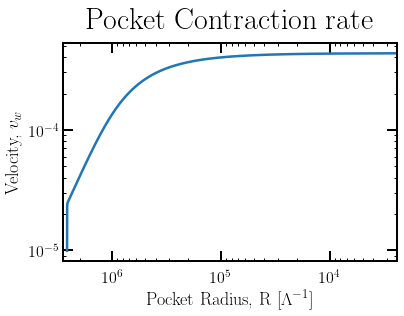

In [65]:
# vary over ii to see if the individual velocity plots make sense #
ii=2
plt.figure()
ax = plt.gca()
ax.loglog()

ax.set_xlim([vs[ii][0,0]*1.1, vs[ii][-2,0]*.99])
ax.plot(vs[ii][:,0], vs[ii][:,1])#, label='0.5')
ax.set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=18)
ax.set_ylabel(r'Velocity, $v_w$', fontsize=18)
ax.set_title('Pocket Contraction rate', fontsize=30)

In [57]:
# Linear Fit
from scipy.optimize import curve_fit

def f(x, A, B):
    return A*x + B

popt, pcov = curve_fit(f, np.log10(Lams), np.log10(v_asymp))
print(popt)

[ 0.19967299 -3.76118052]


Text(0.5, 1.0, 'Pocket Contraction Rate')

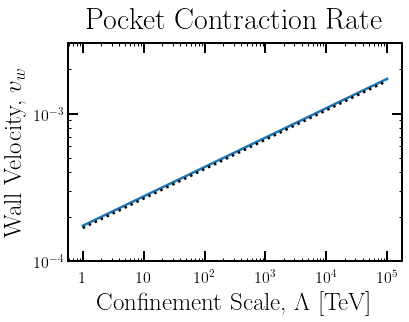

In [59]:
# Reduced Planck Mass
Mpl_red = 1.220910e16/np.sqrt(8*np.pi)

plt.figure()
ax = plt.gca()
ax.loglog()

ax.plot(Lams, v_asymp)
ax.set_ylim([1e-4, 3e-3])
ax.plot(Lams, 0.2*(Lams/Mpl_red)**(.2), linestyle=':', color='k', label='fit')#, label='0.5')
ax.set_xlabel(r'Confinement Scale, $\Lambda$ [TeV]', fontsize=25)
ax.set_ylabel(r'Wall Velocity, $v_w$', fontsize=25)
ax.set_title('Pocket Contraction Rate', fontsize=30)

# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/Strong_DM/Draft/figures/vw_vs_lam.pdf')

# Including Quark Pressure

The first half of the phase transition is unaffected by quark pressure, so we only have to focus on the second half. Quark pressure is still irrelevant at the beginning of pocket contraction, so we can set our initial conditions using lessons learned above in the notebook. 

To start, all of our pockets will still be of the same radius, 
$$R|_{\mathrm{init}} = R_1 \, .$$ 

At percolation, when $x=1/2$, we will find that the number density of pockets must be
$$n_{\mathrm{pocket}}=\frac3{8\pi R_1^3}\,.$$ 

These pockets will still initially contract at a rate 
$$v_w = -(T_c-T)/T_c \, .$$

No matter what initial degree of supercooling we set the universe to, since pockets start out so large, the system will quickly find the equilibrium point at which the heating rate from injected latent heat cancels the cooling rate from Hubble expansion.  So we will find that initially $v_w = \frac{100 H}{4\pi R_1^2 n_{\mathrm{pocket}}} = \frac{200 R_1^2}{3 R^2} (H \, R_1)$. Relating the velocity to the degree of supercooling, we find an initial temperature of

$$ T|_{\mathrm{init}} = T_c\left(1- \frac{200 H \, R_1}{3}\right) \, .$$

In [5]:
%autoreload
# Measure everything in units of Tc
Tc    = 1
L, mu, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
rho = np.pi**2/30*106.75 * Tc**4

Mpl   = ct.Mpl/np.sqrt(3)/1e12
H    = np.sqrt(rho)/Mpl #ct.hubble(1e12)/1e12
dt   = 1e-6/H;

# Second Half of the Phase Transition: Pocket Contraction #
R1 = 10**(-8/3) * (ct.Mpl/1e12/Tc)**(2/3)
n_pocket = 3/(8*np.pi * R1**3)

Ts     = np.array([1-200*H*R1/3])
xs     = np.array([0.5])
Rs     = np.array([R1])
times  = np.array([0])

Now, however, we must keep track of quark properties. Before the quark pressure "becomes relevant" we use the same method as we did before. However, once the quark pressure
$$ p_q = n_q T $$
is large enough to oppose the combined forces of surface tension and the gluon pressure difference when the wall is fully supercooled, we say that the quark pressure has "become relevant" and we switch over to a new regime.

To compute the quark pressure, we need a couple of quantities from the companion Jupyter Notebook, "CompositeDM.ipynb." First, we need to be able to compute $N_q = 4\pi/3 R^3 n_q$. 
To find its initial value, we perform a standard freeze-out calculation:

In [6]:
%autoreload
LambdaD=Tc*1e12 # in eV now
mq = 1000 * LambdaD
Nc=3

sigmav = ct.xsec(mq, LambdaD, Nc, 'qbq_gg')

# Initial conditions
xinit = 10
Tinit = mq / xinit
init_cond = np.array(np.log(ct.Yeq(2, mq, xinit, LambdaD, Nc)*1.001))

# Solution of Boltzmann equations
lnx_vec = np.arange(np.log(xinit), np.log(mq/LambdaD), .0005)
x_vec = np.exp(lnx_vec)
sym = ct.get_history(init_cond, lnx_vec, mq, sigmav, LambdaD, Nc, gDM=2)

[9.9, 1100.0, 6.659037219044067e-13, 4.374852002921955e-06]

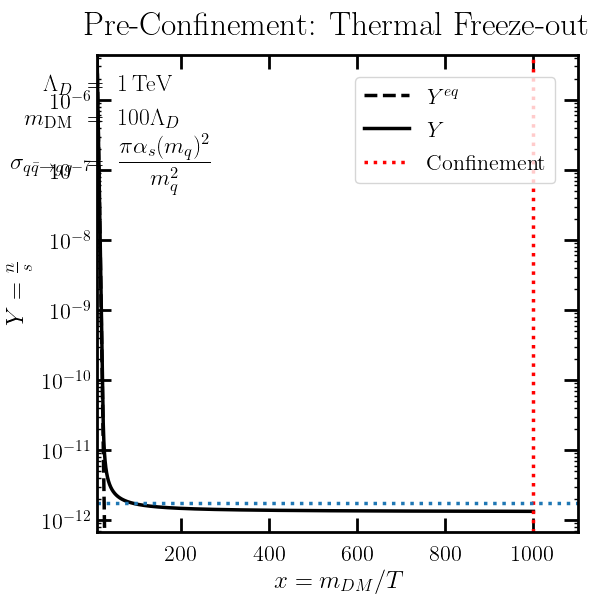

In [7]:
### Plot the results ###
plt.figure()
ax = plt.gca()
ax.set_yscale('log')
xtmp = 10**np.arange(np.log10(xinit), np.log10(mq/LambdaD), .01)
plt.plot(xtmp, ct.Yeq(2, mq, xtmp, LambdaD, Nc), color='k', linestyle='--', label=r'$Y^{eq}$')
plt.plot(x_vec, sym,      color='k',    linestyle='solid', label=r'$Y$')


plt.xlabel(r'$x = m_{DM}/T$')
plt.ylabel(r'$Y = \frac{n}{s}$')

txt = r"\begin{eqnarray*}" + \
    r"\Lambda_D &=& 1\,\mathrm{TeV} \\" + \
    r"m_{\mathrm{DM}} &=& 100 \Lambda_D \\" + \
    r"\sigma_{q\bar{q} \to gg} &=& \frac{\pi\alpha_s(m_q)^2}{m_q^2}" + \
    r"\end{eqnarray*}"
# txt = r"$\Lambda_D = 1\,$TeV, $m_{\mathrm{DM}} = 40 \Lambda_D$"
ax.text(40, 3e-7, txt,
         {'color': 'black', 'fontsize': 17, 'ha': 'center', 'va': 'center'})
          #'bbox': dict(boxstyle="round", fc=(.5,.5,.5,.02), ec="black", pad=0.33)})

plt.axvline(mq/LambdaD, color='red', linestyle=':', label='Confinement')
plt.title(r'Pre-Confinement: Thermal Freeze-out')#, $q\bar{q} \to gg$')
leg = plt.legend(loc=1)
plt.axhline(5*LambdaD**3/(sigmav * ct.Mpl * mq/20)/ct.s(LambdaD, LambdaD, Nc), linestyle=':')
offset=.5
plt.axis([xinit*.99, mq/LambdaD*1.1, sym[-1]*(1-offset), np.exp(init_cond[0]*(1-0*offset))])

We then say that the quark density dilutes by a factor of $\left(\frac{T_c}{T}\right)^3$ until it reaches the phase transition.  
The initial number of quarks that get trapped in a pocket is then

$$N_q|_{\mathrm{init}} = 4\pi/3 R_1^3 n_q(T_c) \, .$$

In [9]:
Y_fo = sym[-1]
entropy_c = ct.s(LambdaD, LambdaD, Nc)

n_init = Y_fo * entropy_c
Vinit   = 4*np.pi*(R1/LambdaD)**3/3
Nq_init = n_init * Vinit

print('Nq_init: ', Nq_init)
print('nq_init: ', n_init)

Nq_init:  [1.53379572e+13]
nq_init:  [6.17378455e+25]


In [10]:
%autoreload
engLs = {part: ct.engL(mq, LambdaD, part) for part in ct.inds}
mLs   = {part: ct.mL(mq, LambdaD, part) for part in ct.inds}
logxsec_list = {process: np.log(ct.xsec(mq, LambdaD, Nc, process)) 
                for process in ct.process_ind}

good_approx, dNq_dt, logNs = ct.get_simple_Ns(
    ct.boltz_coll_list, ct.boltz_weights, Nq_init, np.log(R1), mq, 
    LambdaD, Nc, 1, mLs, engLs, logxsec_list
)

In [313]:
yinit = np.log(R1)
y_vec = np.arange(yinit, 0, -.01)
init = ct.get_init(mq, LambdaD, Nc, Nq_init, yinit)

In [14]:
%autoreload
ct.make_log_eq_fac_list(engLs, mLs)

{'q': array([-1.97877121e+03, -1.98906685e+03, -1.98527619e+03, -1.99373396e+03,
         8.45776521e+00,  4.66710907e+00,  3.79065614e+00, -3.98280081e+03,
        -1.98906685e+03, -1.99373396e+03, -3.98746792e+03, -1.99752462e+03,
        -1.99373396e+03]),
 'qq': array([-1.98906685e+03, -3.97629582e+03, -1.99752462e+03, -2.98403850e+03,
         4.66710907e+00,  3.79065614e+00,  8.45776521e+00, -1.98527619e+03,
        -1.98994330e+03, -1.99373396e+03, -9.94971652e+02]),
 'B': array([-1.98527619e+03, -1.99373396e+03, -3.98280081e+03, -1.99373396e+03,
        -5.96623913e+03, -3.98746792e+03, -1.98994330e+03,  4.66710907e+00,
         3.79065614e+00])}

$$
\begin{alignat}{1}
N_q T_{\mathrm{wall}} &= \frac{8\pi}{3}\sigma R^2 + \frac{4\pi}{3} \frac{(T_c-T_{\mathrm{wall}})}{T_c} l \, R^3 \\
\dot{T}_{\mathrm{wall}} &= (v_w - \, (T_{\mathrm{wall}}-T)/T_c) \Lambda^2 \\
v_w &= -\frac{\dot{N_q} T_{\mathrm{wall}} + \left(N_q + \frac{4\pi l R^3}{3 T_c}\right) \dot{T}_{\mathrm{wall}}}{\frac{4\pi}{3}R\left(4 \sigma + 3 \frac{(T_c-T_{\mathrm{wall}})}{T_c} l R\right)} \, .
\end{alignat}
$$

In [99]:
(R1**2*.02*8-Nq_init)

array([2.27997247e+14])

In [143]:
def get_suppress(Rs, vs, Ns, mq, LambdaD):
    v_b = np.sqrt(LambdaD/mq)
    y_vec = np.log(Rs)
    esc_func = interp1d(y_vec, (v_b+vs)/vs*Ns[:,2]/Ns[0,0]*9, kind='linear')
    return quad(esc_func, y_vec[-1], y_vec[0])[0]

In [144]:
get_suppress(Rs,vs,Ns,mq,LambdaD)

4.798043254413038e-22

In [149]:
%%prun
%autoreload
# Measure everything in units of Tc
Tc    = 1
l, sigma, kappa = 1.413*Tc**4, 0.02*Tc**3, 7*10**-5
rho = np.pi**2/30*106.75 * Tc**4

Mpl   = ct.Mpl/np.sqrt(3)/1e12
H    = np.sqrt(rho)/Mpl #ct.hubble(1e12)/1e12
dt   = 1e-6/H;

# Second Half of the Phase Transition: Pocket Contraction #
R1 = 10**(-8/3) * (ct.Mpl/1e12/Tc)**(2/3)
n_pocket = 3/(8*np.pi * R1**3)

# Nq_init
xinit = 10
Tinit = mq / xinit
init_cond = np.array(np.log(ct.Yeq(2, mq, xinit, LambdaD, Nc)*1.001))
lnx_vec = np.arange(np.log(xinit), np.log(mq/LambdaD), .0005)
Y_fo = ct.get_history(init_cond, lnx_vec, mq, sigmav, LambdaD, Nc, gDM=2)
entropy_c = ct.s(LambdaD, LambdaD, Nc)

n_init = Y_fo[-1] * entropy_c
Vinit   = 4*np.pi*(R1/LambdaD)**3/3
Nq_init = n_init * Vinit
interval=20

# Ns     = np.array([[Nq_init[0], 1, 1]])
Ns     = np.exp([ct.get_init(mq, LambdaD, Nc, Nq_init, np.log(R1))])
dumbNs = np.exp([ct.get_init(mq, LambdaD, Nc, Nq_init, np.log(R1))])

Ts, vs     = np.array([1-200*H*R1/3]), np.array([1-200*H*R1/3])
t_wall = np.array([1])
xs, Rs, times     = np.array([0.5]), np.array([R1]), np.array([0])
# suppress = np.array([])

k, ii, fudge, dNq_dt, fake_vw=0, 0, 0, 0, 0
skip=1e3

pq_relevant, faster_switch, even_faster_switch, fastest_switch=False, False, False, False

while (Rs[-1]>0) and (Ns[-1,2]/max(Ns[:,2])>1e-8):
    
    Ts = np.append(Ts, Ts[k]*(1 - dt*H))
    
    c=4*np.pi/3
    ratio = c*(2 * sigma*Rs[-1]**2 + (1-Ts[-1])*l*Rs[-1]**3)/(Nq_init*Ts[-1])
    
    if (ratio<1):
        ii += 1
#         if ii>100:
#             fudge=1
            
        if not pq_relevant:
            print('Relevant', Rs[-1], ratio)
#             Rs[-1]=234231
        pq_relevant=True
        
#         skip=1
    if not pq_relevant:
        vs = np.append(vs,(1-Ts[k]))
    else:
        ### FOR POUYA ###
        c=4*np.pi/3
#         suppress = np.append(suppress, get_suppress(Rs, vs, Ns, mq, LambdaD))
        if ii<2 or True:
            Tdot = (Ts[-1]-Ts[-2])/dt
        else:
            Tdot = (t_wall[-1]-t_wall[-2])/dt
        
        num = -fudge*dNq_dt*Ts[-1] - (Ns[-1,0] + c*l*Rs[-1]**3) * Tdot
        denom = c*Rs[-1]*(4*sigma + 3*(1-Ts[-1])*l*Rs[-1])
        vs = np.append(vs, num/denom)
        
#         t_wall = np.append(t_wall, t_wall[-1]+(vs[-1]-(t_wall[-1]-Ts[-1]))*dt)
        
        
        
#         fake_vw = -(0*dNq_dt*Ts[-1] + (Ns[-1,0] + c*l*Rs[-1]**3) * (Ts[-1]-Ts[-2])/dt)/denom
#         print(Rs[-1], num/denom)

#     if (Rs[-1]<1e7) and (not faster_switch):
#         print('faster', k)
#         interval=5
#         faster_switch=True

#     if (vs[-1] < 2e-7) and (not faster_switch):
#         print('faster', k)
#         dt = dt*100
#         faster_switch=True
        
#     if (vs[-1] < 2e-9) and (not even_faster_switch):
#         print('FASTER!', k)
#         dt = dt*10
#         even_faster_switch=True
        
#     if (v_w < 1e-9) and (not fastest_switch):
#         dt = dt*10
#         fastest_switch=True
        

    xs = np.append(xs, 1-4*np.pi*Rs[-1]**3/3 * n_pocket)
    Rs = np.append(Rs, Rs[-1] - vs[-1]*dt)

    # Injected heat
    Ts[k+1] += L/(4*rho/Tc) * (xs[k+1] - xs[k])
    
    good_approx, dNq_dt, logNs = ct.get_simple_Ns(
        ct.boltz_coll_list, ct.boltz_weights, dumbNs[-1,0], np.log(Rs[-1]), mq, 
        LambdaD, Nc, vs[-1], mLs, engLs, logxsec_list
    )
    dumbNs = np.append(dumbNs, [np.exp(logNs)],axis=0)
    dumbNs[-1,0] += dNq_dt*dt
    

    if (ii>1e3) and False:
        if (k+1)%interval==0:
            y_vec = np.log([Rs[-interval-1], Rs[-1]])
            soln = ct.get_B(y_vec, np.log(Ns[-1]), mq, 
                            LambdaD, Nc, vterm=vs[-1], mxstep = 1000, rtol=1e-3)
            Ns = np.append(Ns, [np.exp(soln[-1])],axis=0)
        
    else:
        Ns = np.append(Ns, [np.exp(logNs)],axis=0)
        Ns[-1,0] += dNq_dt*dt
    
    
    if k%skip == 0: #and pq_relevant:
        print(Rs[-1], c*(2 * sigma*Rs[-1]**2 + (1-Ts[-1])*l*Rs[-1]**3)/(Ns[-1,0]*Ts[-1])
              , vs[-1])
#         print(Rs[-1], v_w, dNq_dt/((Ns[-1,0] + c*l*Rs[-1]**3) * (-H)),
#              dNq_dt/((Ns[-1,0] + c*l*Rs[-1]**3) * (Ts[-1]-Ts[-2])/dt))#Ns[-1,0])

    times = np.append(times, times[-1] + dt)
    k+=1
    
#     if k==200:
#         break

38995413.220466375 273643.0336511398 1.0957748166062764e-05
36219086.57292926 231119.6111342384 1.2602412414408626e-05
32942989.54747388 209960.0753183281 1.5214251904427378e-05
28849883.502993952 183324.49320237932 1.977611487047337e-05
23112002.29081461 145125.26982845264 3.0440425007327576e-05
11117031.661276072 52932.60204332628 9.955526575422535e-05
Relevant 162269.25741764787 [0.43983876]


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """


104969.28627285713 77.82739054186679 1.5004336262103665e-07
83090.25275846625 333.04624383481945 5.8826130529505324e-08
72529.55327208128 760.4867131078526 3.411464305241261e-08
 

In [807]:
Rs[sum(c*(2 * sigma*Rs**2 + (1-Ts)*l*Rs**3)/(Nq_init*Ts)>1)]

162269.25741764787

In [809]:
Rs[sum(c*(2 * sigma*Rs**2 + 0*(1-Ts)*l*Rs**3)/(Nq_init*Ts)>1)]

8232247.146964417

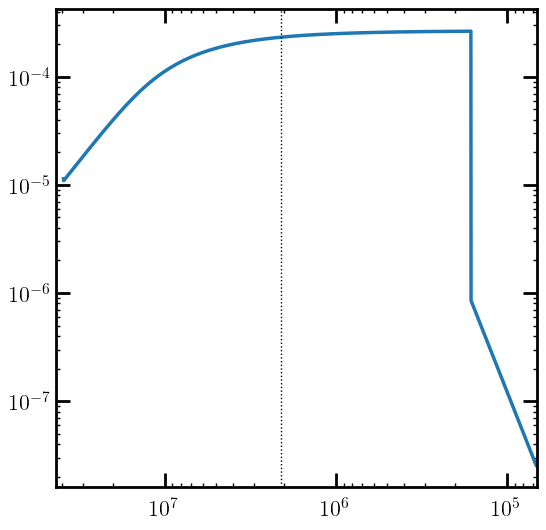

In [110]:
plt.figure()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)
plt.loglog()
plt.plot(Rs[10:], vs[10:])
plt.axvline(2.1e6, color='k', linestyle=':', linewidth=1.0)

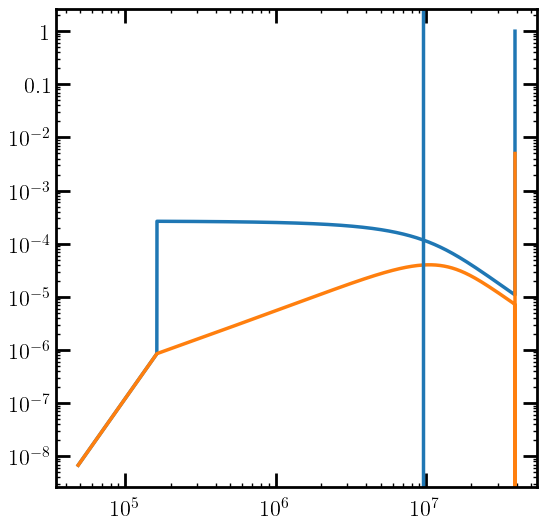

In [57]:
stupid=-1

num = - (Ns[:-1,0] + c*l*Rs[:-2]**3) * np.diff(Ts)[:-1]/dt
denom = c*Rs[:-2]*(4*sigma + 3*(1-Ts[:-2])*l*Rs[:-2])
plt.figure()
plt.loglog()
plt.plot(Rs[:],vs)
plt.plot(Rs[:-2], num/denom)
plt.axvline(Rs[sum(c*(2 * sigma*Rs**2 + 0*(1-Ts)*l*Rs**3)/(Nq_init*Ts)>1)])

In [75]:
Ts.shape

(47695,)

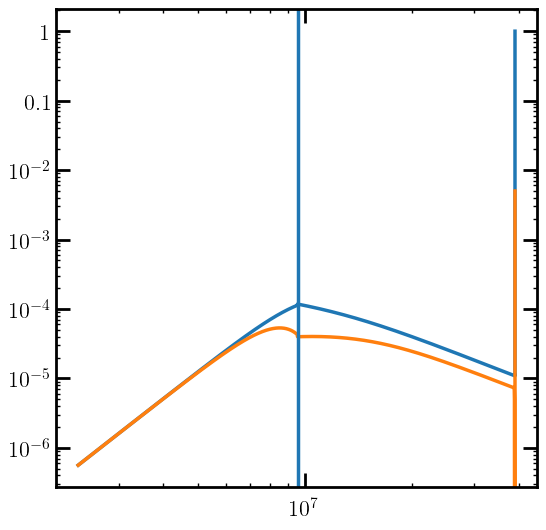

In [96]:
num = - (Ns[:,0] + c*l*Rs[:]**3) * np.diff(Ts)[:]/dt
denom = c*Rs[:]*(4*sigma + 3*(1-Ts[:-1])*l*Rs[:])
plt.figure()
plt.loglog()
plt.plot(Rs[:],vs)
plt.plot(Rs[:], num/denom)
plt.axvline(Rs[sum(c*(2 * sigma*Rs**2 + 0*(1-Ts[:-1])*l*Rs**3)/(Nq_init*Ts[:-1])>1)])

In [59]:
v_b = np.sqrt(LambdaD/mq)

In [79]:
sum(v_b/vs[:]*dumbNs[:,2]/Nq_init*9)

2.3398149357251536e-07

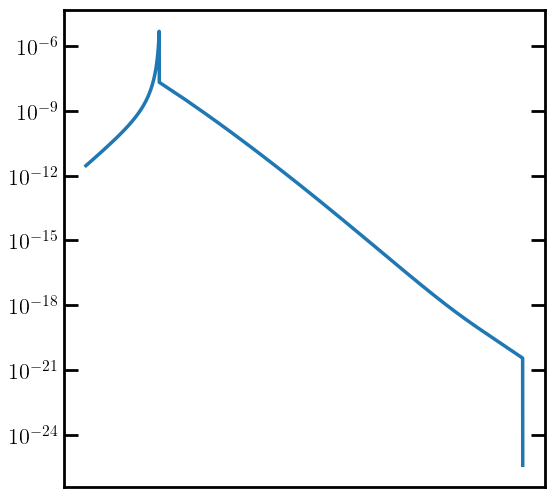

In [112]:
y_vec = np.log(Rs[:])
plt.figure()
plt.loglog()
plt.plot(y_vec, v_b/vs[:]*dumbNs[:,2]/Nq_init*9)

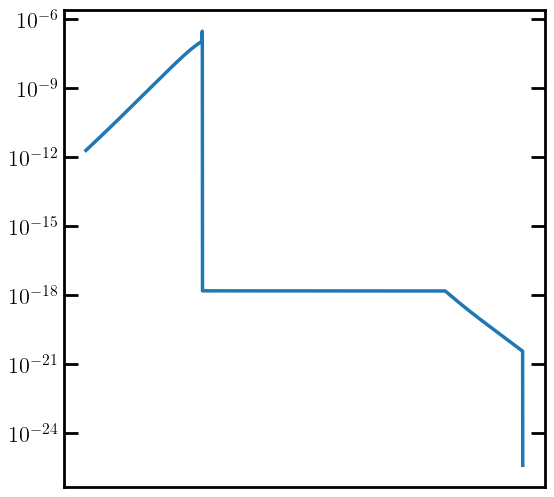

In [108]:
y_vec = np.log(Rs[:-1])
plt.figure()
plt.loglog()
plt.plot(y_vec, v_b/vs[:-1]*dumbNs[:,2]/Nq_init*9)

In [117]:
y_vec = np.log(Rs[:])
esc_func = interp1d(y_vec,
                    v_b/vs[:]*dumbNs[:,2]/Nq_init*9, 
                    kind='linear')
quad(esc_func, y_vec[-1], y_vec[0])[0]<1/np.sqrt(Nq_init[0])

True

ValueError: x and y must have same first dimension, but have shapes (8633,) and (8632,)

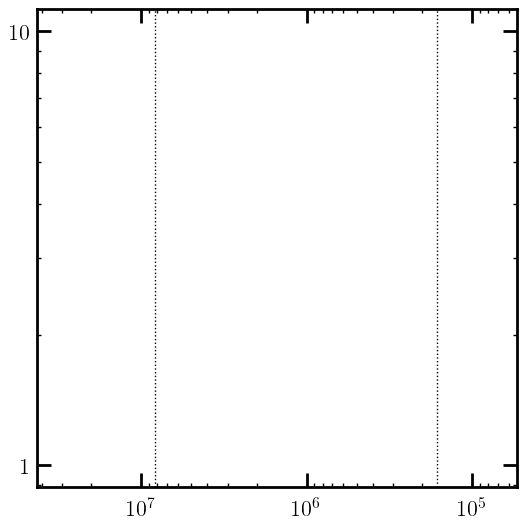

In [103]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)
# plt.plot(tmp_Rs, Ns[:,0]/Nq_init,color='red')
# plt.plot(tmp_Rs, Ns[:,1]/Nq_init,color='green')
# plt.plot(tmp_Rs, Ns[:,2]/Nq_init,color='black')
# plt.axvline(2.1e6, color='k', linestyle=':', linewidth=1.0)
plt.axvline(162269, color='k', linestyle=':', linewidth=1.0)
plt.axvline(8232247.146964417, color='k', linestyle=':', linewidth=1.0)

plt.plot(Rs[:], dumbNs[:,0]/Nq_init,color='red', linestyle=':')
plt.plot(Rs[:], dumbNs[:,1]/Nq_init,color='green', linestyle=':')
plt.plot(Rs[:], dumbNs[:,2]/Nq_init,color='black', linestyle=':')
plt.plot(Rs, vs)

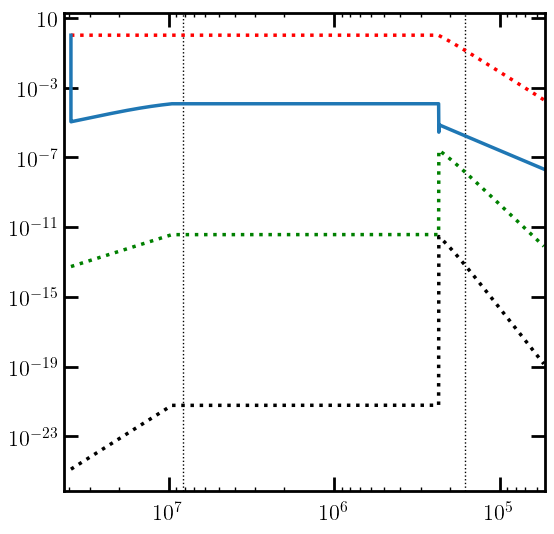

In [104]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)
# plt.plot(tmp_Rs, Ns[:,0]/Nq_init,color='red')
# plt.plot(tmp_Rs, Ns[:,1]/Nq_init,color='green')
# plt.plot(tmp_Rs, Ns[:,2]/Nq_init,color='black')
# plt.axvline(2.1e6, color='k', linestyle=':', linewidth=1.0)
plt.axvline(162269, color='k', linestyle=':', linewidth=1.0)
plt.axvline(8232247.146964417, color='k', linestyle=':', linewidth=1.0)

plt.plot(Rs[:-1], dumbNs[:,0]/Nq_init,color='red', linestyle=':')
plt.plot(Rs[:-1], dumbNs[:,1]/Nq_init,color='green', linestyle=':')
plt.plot(Rs[:-1], dumbNs[:,2]/Nq_init,color='black', linestyle=':')
plt.plot(Rs, vs)

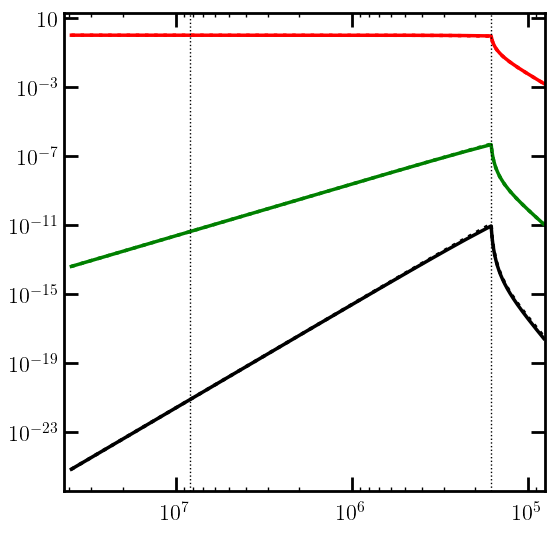

In [810]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)
plt.plot(tmp_Rs, Ns[:,0]/Nq_init,color='red')
plt.plot(tmp_Rs, Ns[:,1]/Nq_init,color='green')
plt.plot(tmp_Rs, Ns[:,2]/Nq_init,color='black')
# plt.axvline(2.1e6, color='k', linestyle=':', linewidth=1.0)
plt.axvline(162269, color='k', linestyle=':', linewidth=1.0)
plt.axvline(8232247.146964417, color='k', linestyle=':', linewidth=1.0)

plt.plot(Rs, dumbNs[:,0]/Nq_init,color='red', linestyle=':')
plt.plot(Rs, dumbNs[:,1]/Nq_init,color='green', linestyle=':')
plt.plot(Rs, dumbNs[:,2]/Nq_init,color='black', linestyle=':')

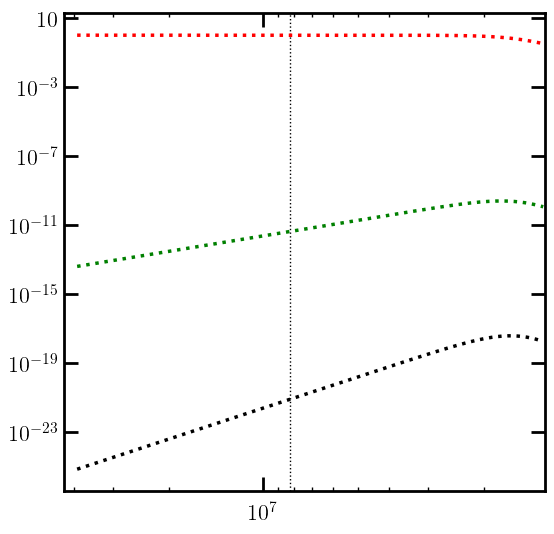

In [851]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)
# plt.plot(tmp_Rs, Ns[:,0]/Nq_init,color='red')
# plt.plot(tmp_Rs, Ns[:,1]/Nq_init,color='green')
# plt.plot(tmp_Rs, Ns[:,2]/Nq_init,color='black')
# plt.axvline(2.1e6, color='k', linestyle=':', linewidth=1.0)
plt.axvline(162269, color='k', linestyle=':', linewidth=1.0)
plt.axvline(8232247.146964417, color='k', linestyle=':', linewidth=1.0)

plt.plot(Rs[:], dumbNs[:,0]/Nq_init,color='red', linestyle=':')
plt.plot(Rs[:], dumbNs[:,1]/Nq_init,color='green', linestyle=':')
plt.plot(Rs[:], dumbNs[:,2]/Nq_init,color='black', linestyle=':')

In [852]:
y_vec = np.log(Rs[:])
esc_func = interp1d(y_vec,
                    v_b/vs[:]*dumbNs[:,2]/Nq_init, 
                    kind='cubic')
quad(esc_func, y_vec[-1], y_vec[0])[0]*9

2.97789642546842e-12

In [822]:
times[-1]*H

0.08344199999985048

In [779]:
v_b=np.sqrt(LambdaD/mq)

In [791]:
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [802]:
y_vec = np.log(Rs[:-1])
esc_func = interp1d(y_vec,
                    v_b/vs[:-1]*Ns[:,2]/Nq_init, 
                    kind='cubic')
suppress = quad(esc_func, y_vec[-1], y_vec[0])[0]*9

In [803]:
suppress

-2.511565219313518e-05

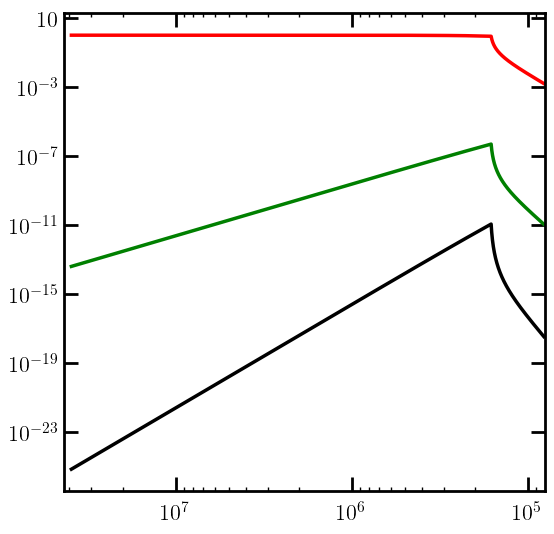

In [769]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)

In [679]:
times[-1]*H

4.4078200000000916

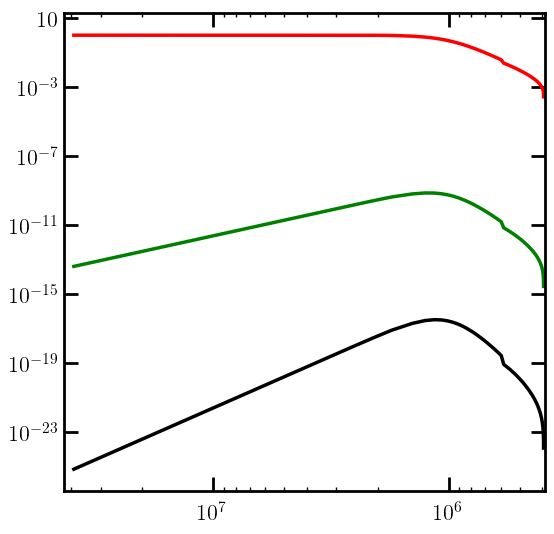

In [594]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-2]*.99)
plt.plot(Rs[:-1:interval], Ns[:,0]/Nq_init,color='red')
plt.plot(Rs[:-1:interval], Ns[:,1]/Nq_init,color='green')
plt.plot(Rs[:-1:interval], Ns[:,2]/Nq_init,color='black')

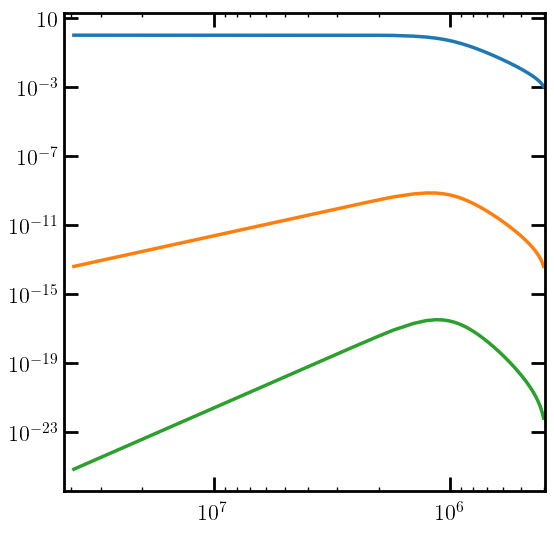

In [544]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-1]*.99)
plt.plot(Rs[:-1:interval], Ns/Nq_init)

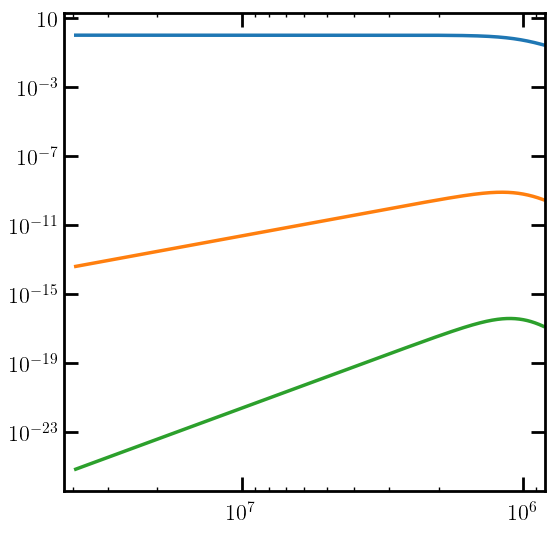

In [541]:
plt.figure()
plt.loglog()
plt.xlim(Rs[0]*1.1, Rs[-1]*.99)
plt.plot(Rs[:-1:interval], Ns/Nq_init)

In [436]:
%autoreload
y_vec = np.log([Rs[-1], Rs[-1] - fake_vw[0]*dt])
soln = ct.get_B(y_vec, np.log(Ns[-1]), mq, LambdaD, Nc, vterm=fake_vw[0], mxstep = 1000, rtol=1e-6)

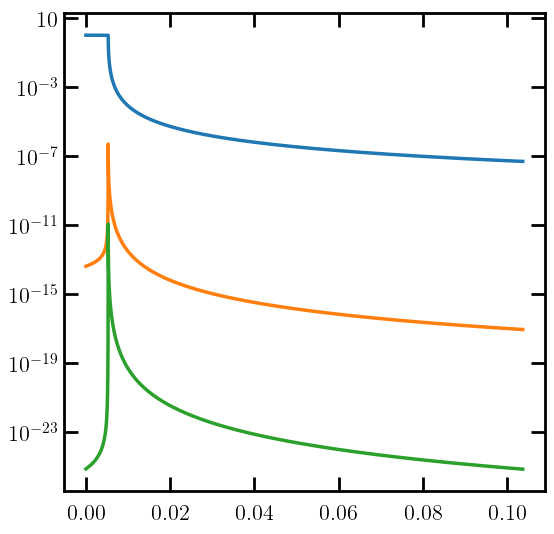

In [402]:
plt.figure()
# plt.loglog()
plt.yscale('log')
# plt.xlim([R1*1.1,0])
plt.plot(times[1:]*H, Ns[2:,0]/Nq_init)
plt.plot(times[1:]*H, Ns[2:,1]/Nq_init)
plt.plot(times[1:]*H, Ns[2:,2]/Nq_init)

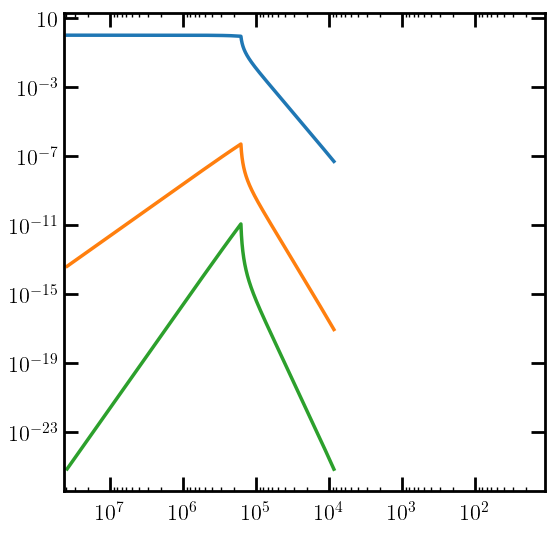

In [393]:
plt.figure()
plt.loglog()
plt.xlim([R1*1.1,0])
plt.plot(Rs[1:], Ns[1:,0]/Nq_init)
plt.plot(Rs[1:], Ns[1:,1]/Nq_init)
plt.plot(Rs[1:], Ns[1:,2]/Nq_init)

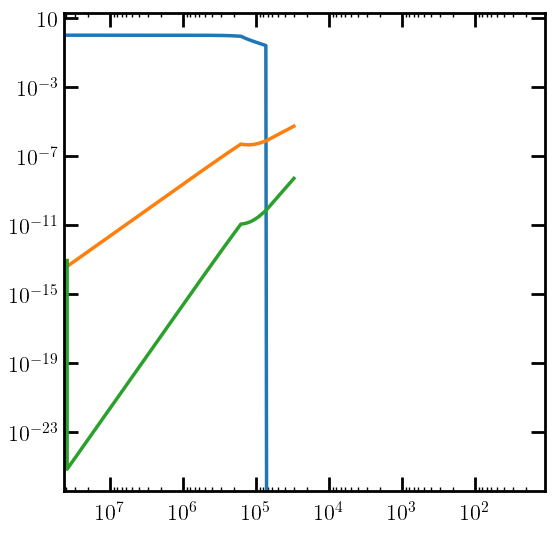

In [383]:
plt.figure()
plt.loglog()
plt.xlim([R1*1.1,0])
plt.plot(Rs, Ns[:,0]/Nq_init)
plt.plot(Rs, Ns[:,1]/Nq_init)
plt.plot(Rs, Ns[:,2]/Nq_init)

In [253]:
ind=np.sum(Nq_init**Tc/(
            8*np.pi/3 * sigma*Rs**2 + 4*np.pi/3 * l * (1-Ts) * Rs**3
        )<.1)

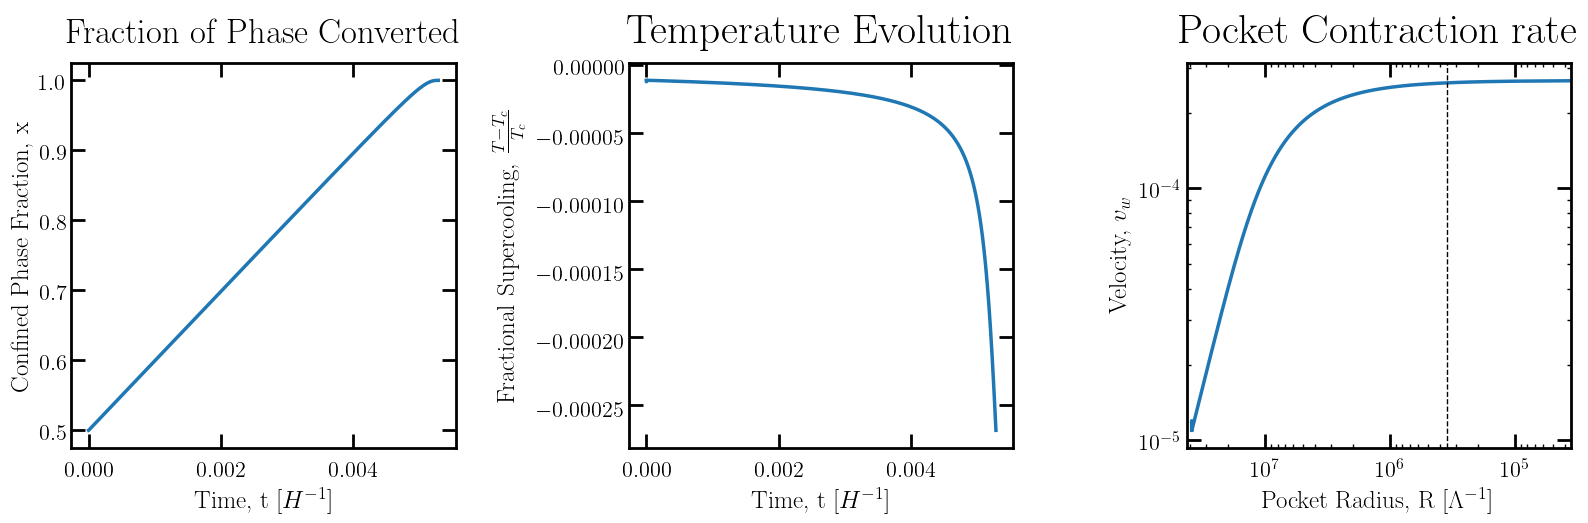

In [187]:
fig, axarr = plt.subplots(1, 3, figsize=(15,5))

axarr[0].plot(times*H, xs)
axarr[0].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[0].set_ylabel('Confined Phase Fraction, x', fontsize=18)
axarr[0].set_title('Fraction of Phase Converted', fontsize=25)


axarr[1].plot(times*H, Ts/Tc-1)
axarr[1].set_xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
axarr[1].set_ylabel(r'Fractional Supercooling, $\frac{T-T_c}{T_c}$', fontsize=18)
axarr[1].set_title('Temperature Evolution', fontsize=30)

axarr[2].set_xlim([Rs[0]*1.1, Rs[-2]*.99])
axarr[2].plot(Rs, 1-Ts/Tc)#, label='0.5')
axarr[2].loglog()
axarr[2].set_xlabel(r'Pocket Radius, R [$\Lambda^{-1}$]', fontsize=18)
axarr[2].set_ylabel(r'Velocity, $v_w$', fontsize=18)
axarr[2].set_title('Pocket Contraction rate', fontsize=30)
axarr[2].axvline(Rs[ind], linestyle='--',color='k', linewidth=1.0)

# c=4*np.pi/3
# num   = -(Nq_init + c*l*Rs[:-1]**3 * np.diff(Ts))/dt
# denom = c*Rs[:-1]*(4*sigma + 3*(1-Ts[:-1])*l*Rs[:-1])
# v_new = num/denom
# print(v_new)
# mask  = v_new > 0

# axarr[2].plot(Rs[:-1][mask], v_new[mask])#, label='0.5')

plt.subplots_adjust(wspace=0.45, left=-0.0, right=1+0.0)

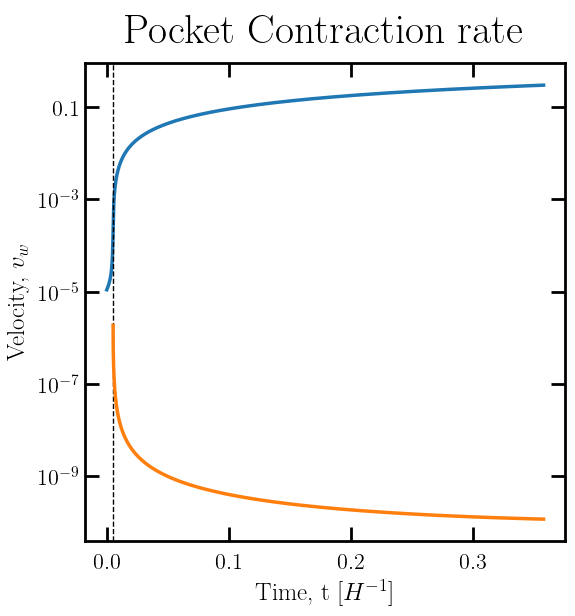

In [263]:
plt.figure()

# plt.xlim([Rs[0]*1.1, Rs[-2]*.99])
plt.yscale('log')
plt.plot(times[65:]*H, 1-Ts[65:]/Tc, label='No Quark Pressure')#, label='0.5')
# plt.loglog()
plt.xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
plt.ylabel(r'Velocity, $v_w$', fontsize=18)
plt.title('Pocket Contraction rate', fontsize=30)
plt.axvline(times[ind]*H, linestyle='--',color='k', linewidth=1.0)

c=4*np.pi/3
num   = -(Nq_init + c*l*Rs**3)*(-H)#np.diff(Ts)/dt
denom = c*Rs*(4*sigma + 3*(1-Ts[:])*l*Rs)
v_new = num/denom
# print(v_new)
# mask  = v_new > 0

plt.plot(times[ind:]*H, v_new[ind:], label='With Quark Pressure')#, label='0.5')

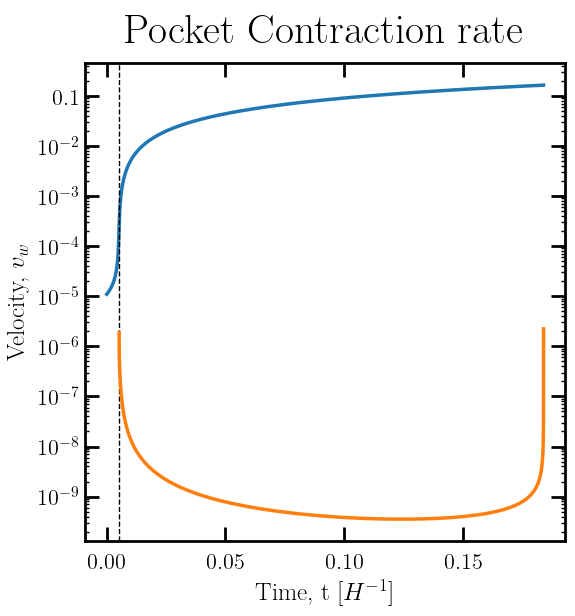

In [257]:
plt.figure()

# plt.xlim([Rs[0]*1.1, Rs[-2]*.99])
plt.yscale('log')
plt.plot(times[65:]*H, 1-Ts[65:]/Tc, label='No Quark Pressure')#, label='0.5')
# plt.loglog()
plt.xlabel(r'Time, t [$H^{-1}$]', fontsize=18)
plt.ylabel(r'Velocity, $v_w$', fontsize=18)
plt.title('Pocket Contraction rate', fontsize=30)
plt.axvline(times[ind]*H, linestyle='--',color='k', linewidth=1.0)

c=4*np.pi/3
num   = -(Nq_init + c*l*Rs**3)*(-H)#np.diff(Ts)/dt
denom = c*Rs*(4*sigma + 3*(1-Ts)*l*Rs)
v_new = num/denom
# print(v_new)
# mask  = v_new > 0

plt.plot(times[ind:]*H, v_new[ind:], label='With Quark Pressure')#, label='0.5')

In [217]:
(c*l*Rs[:-1]**3)

array([3.51041299e+23, 3.50971096e+23, 3.50894496e+23, ...,
       2.52894577e+16, 5.79049310e+15, 2.77029516e+14])

In [216]:
Nq_init/(c*l*Rs[:-1]**3)

array([3.23785332e-11, 3.23850098e-11, 3.23920793e-11, ...,
       4.49444289e-04, 1.96290751e-03, 4.10288496e-02])